September 2022
Sarah McGuire

## NervePool examples

In [1]:
import numpy as np
# complex.py defines a simplicial complex class and functions for pooling
import complex

### Example 1: simplicial complex defined using list of simplices

In [2]:
# Specify lists of simplices which define a simplicial complex
vertex_list = ['a','b','c','d','e','f','g','h','i','j','k','l']
edge_list = ['ab','ac','bc','cd','cj','de','df','dg','ef','gh','gi','gj','gk','gl','hi','jk','jl','kl']
triangle_list = ['abc','gjk','gjl','gkl','jkl']
tetrahedron_list = ['gjkl']

# Gather these lists into a single list
simplices = list([vertex_list,edge_list, triangle_list, tetrahedron_list])

Using list of simplices to construct boundaries...
Simplices: 
 {0: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l'], 1: ['ab', 'ac', 'bc', 'cd', 'cj', 'de', 'df', 'dg', 'ef', 'gh', 'gi', 'gj', 'gk', 'gl', 'hi', 'jk', 'jl', 'kl'], 2: ['abc', 'gjk', 'gjl', 'gkl', 'jkl'], 3: ['gjkl']}
Drawing simplicial complex...


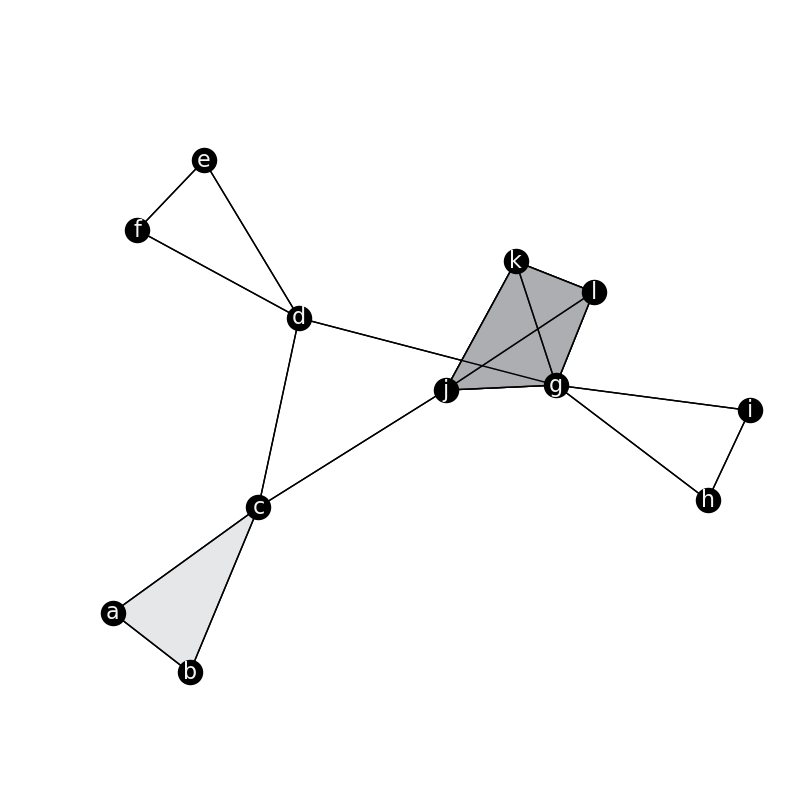

In [3]:
# Use list of simplices to define a simplicial complex, and draw it
SC1 = complex.SComplex(simplices)
SC1.drawComplex()

The simplicial complex class `SComplex` has attributes:
- simplices: dictionary of all simplices that define the complex, with dimension keys
- nodes: list of 0-dim simplices
- edges: list of 1-dim simplices
- cycles: list of 2-dim simplices
- tetra: list of 3-dim simplices
- boundaries: dictionary of all boundary matrices that define the complex, with dimension keys
- B1: numpy array 1-dim boundary matrix
- B2: numpy array 2-dim boundary matrix
- B3: numpy array 3-dim boundary matrix
- A0: numpy array 0-simplex upper adjacency matrix
- A1: numpy array 1-simplex upper adjacency matrix
- A2: numpy array 2-simplex upper adjacency matrix
- A3: numpy array 3-simplex upper adjacency matrix
- dim: maximum dimension of the simplicial complex

And auxillary functions for visualization:
- `drawComplex()`: function to visualize the complex, optionally include argument S0 to draw the vertex cover
- `visualizeA()`: function to visualize the adjacency matrices of the complex,
- `visualizeB()`: function to visualize the boundary matrices of the complex,

Visualizing ADJACENCY MATRICES...


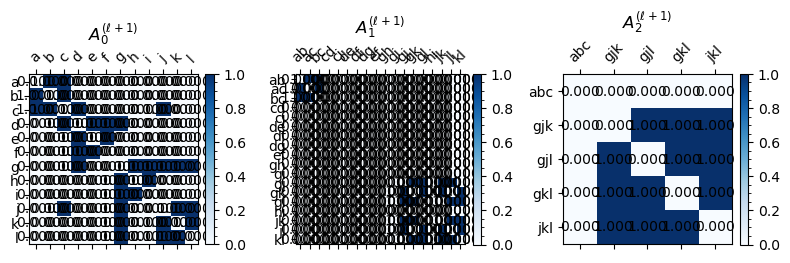

In [4]:
SC1.visualizeA()

Visualizing BOUNDARY MATRICES...


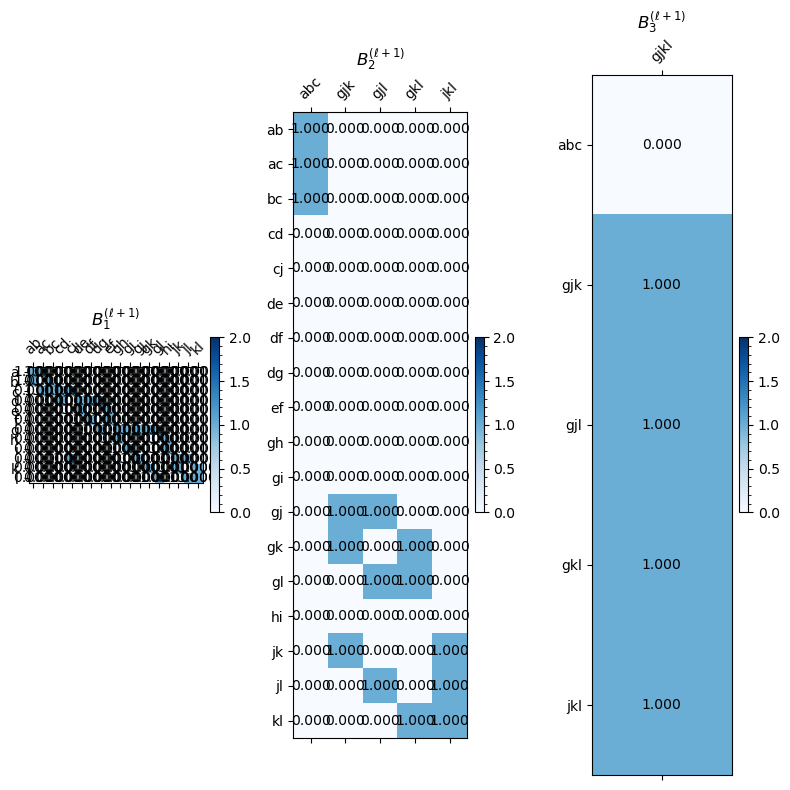

In [5]:
SC1.visualizeB()

Drawing simplicial complex...
Vertex partition: {0: ['a', 'b', 'c', 'j'], 1: ['d', 'e', 'f'], 2: ['g', 'h', 'i'], 3: ['k', 'l']}


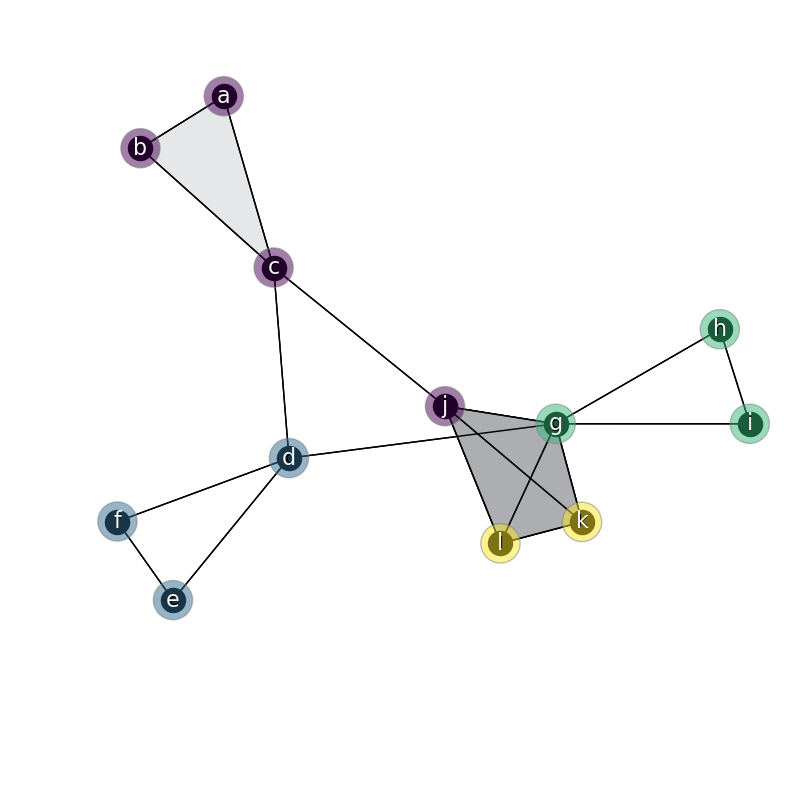

In [6]:
# Specify a vertex cover (as a numpy array of cluster membership)
S0 = np.array([[1,0,0,0],[0,1,0,0],[1,0,0,0],[0,0,1,0],[0,0,1,0],[0,0,1,0],[0,0,0,1],[0,0,0,1],[0,0,0,1],[0,1,0,0],[0,1,0,0],[0,1,0,0]]) # v x v'
S0b = np.array([[1,0,0,0],[1,0,0,0],[1,0,0,0],[0,1,0,0],[0,1,0,0],[0,1,0,0],[0,0,1,0],[0,0,1,0],[0,0,1,0],[1,0,0,0],[0,0,0,1],[0,0,0,1]]) # v x v'

SC1.drawComplex(S0b)

Using list of adjacency matrices to construct simplices...
Simplices: 
 {0: ['a', 'b', 'c', 'd'], 1: ['ab', 'ac', 'ad', 'bc', 'cd'], 2: ['dac']}
Drawing simplicial complex...


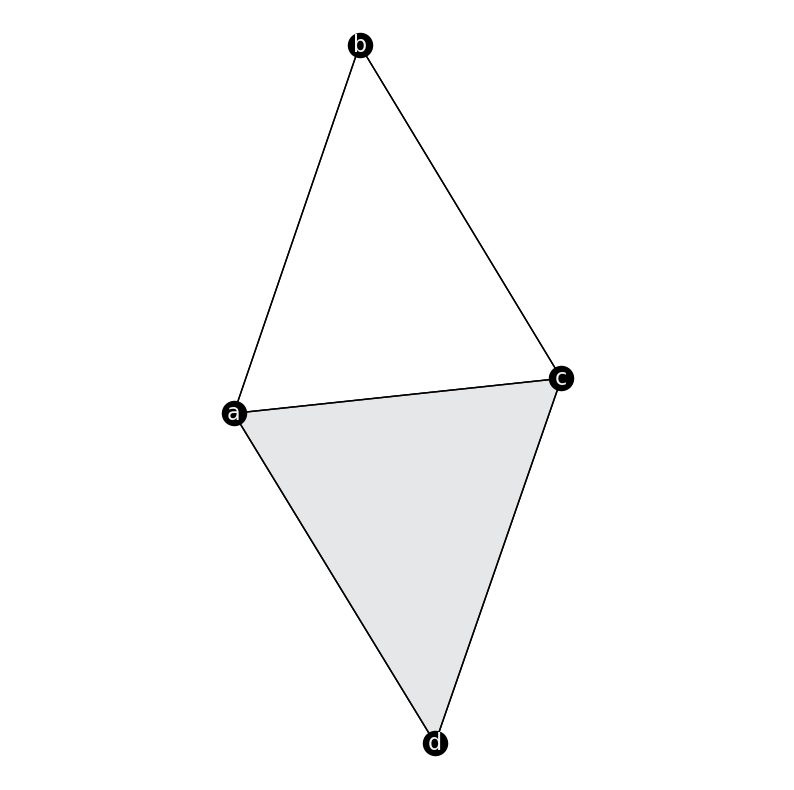

In [7]:
# Use the vertex cluster matrix S0b to pool the complex SC1
SC1_pooled = complex.pool_complex(SC1, S0b)

# Draw the pooled complex
SC1_pooled.drawComplex()

In [8]:
SC1_pooled.B1

array([[0.33333333, 0.33333333, 0.66666667, 0.        , 0.        ],
       [0.33333333, 0.        , 0.        , 0.33333333, 0.        ],
       [0.        , 0.33333333, 0.        , 0.33333333, 0.66666667],
       [0.        , 0.        , 0.66666667, 0.        , 0.66666667]])

Visualizing BOUNDARY MATRICES...


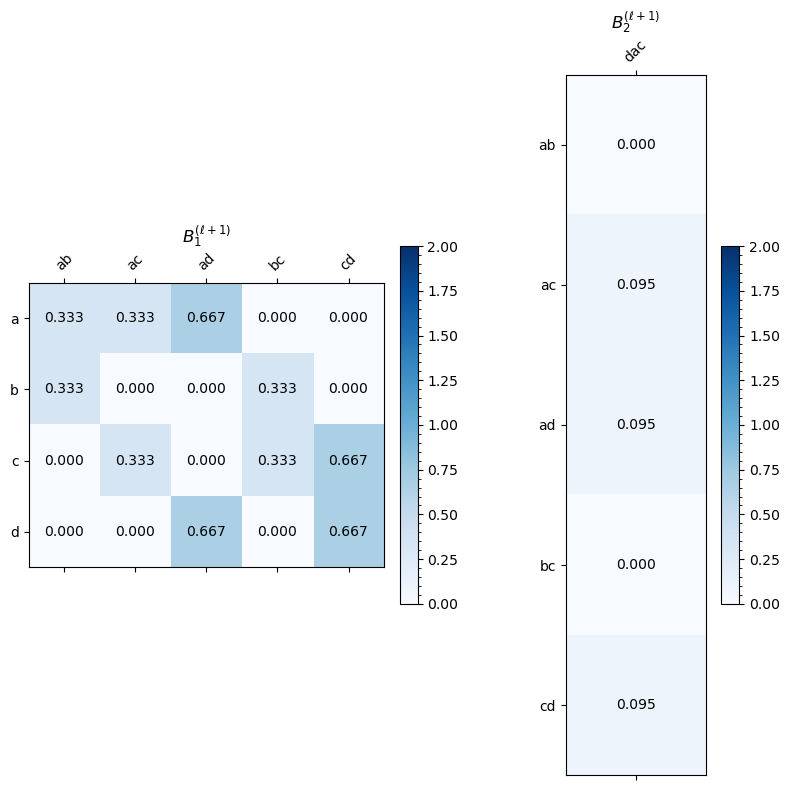

In [9]:
SC1_pooled.visualizeB()

Visualizing ADJACENCY MATRICES...


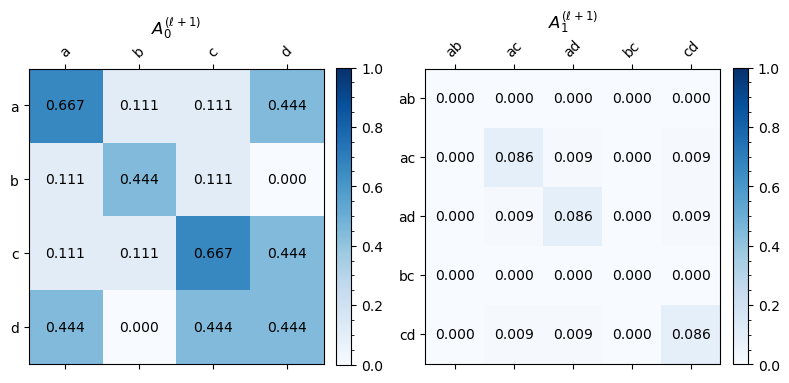

In [10]:
SC1_pooled.visualizeA()

### Example 2- "Identity" NervePool
#### For the same input simplicial complex, now consider a different choice of initial vertex.
#### Let each vertex have its own distinct cluster i.e. $S_0$ is a permutation of the identity matrix

Drawing simplicial complex...
Vertex partition: {4: ['a'], 8: ['b'], 10: ['c'], 6: ['d'], 2: ['e'], 5: ['f'], 11: ['g'], 7: ['h'], 3: ['i'], 0: ['j'], 1: ['k'], 9: ['l']}


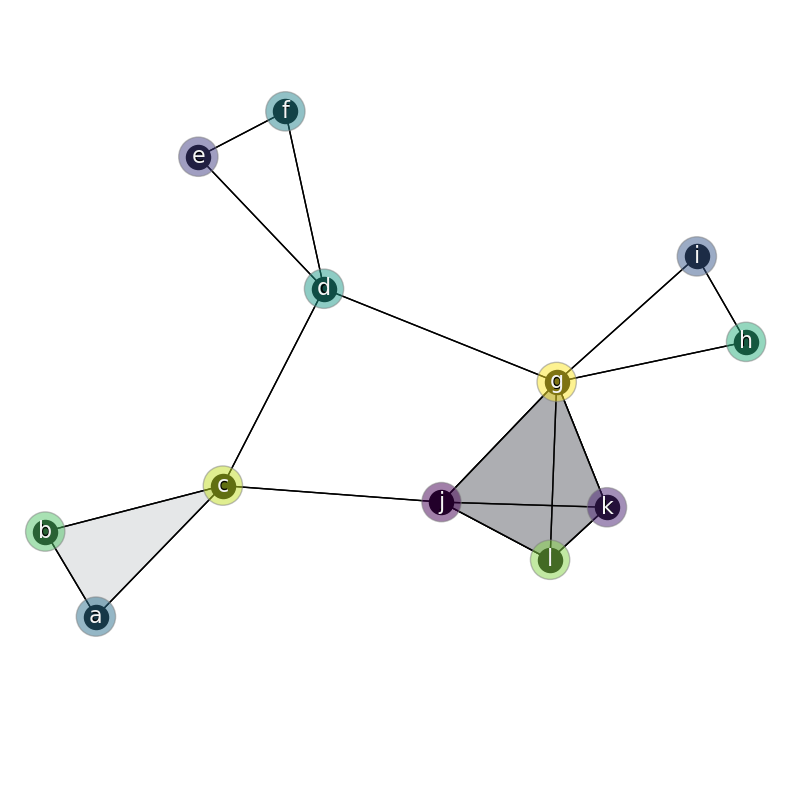

In [11]:
# Specify a vertex cover (as a numpy array of cluster membership)
# Choose S0 to be a randomly permuted identity matrix
S0 = np.eye(len(vertex_list))
np.random.shuffle(S0)  # shuffle rows
# Visualize the complex, with clusters highlighted in different colors
SC1.drawComplex(S0)

Then, use the $S_0 = P*I_p$ to pool the simplicial complex, and note that the resulting simplicial complex has the same structure as the original. 

Using list of adjacency matrices to construct simplices...
Simplices: 
 {0: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l'], 1: ['ab', 'aj', 'ak', 'al', 'bj', 'bl', 'cf', 'cg', 'dh', 'dl', 'ei', 'ek', 'fg', 'gk', 'gl', 'hl', 'ik', 'jl'], 2: ['ajb', 'abl', 'ajl', 'jbl', 'kie'], 3: ['bajl']}
Drawing simplicial complex...
Vertex partition: {4: ['a'], 8: ['b'], 10: ['c'], 6: ['d'], 2: ['e'], 5: ['f'], 11: ['g'], 7: ['h'], 3: ['i'], 0: ['j'], 1: ['k'], 9: ['l']}


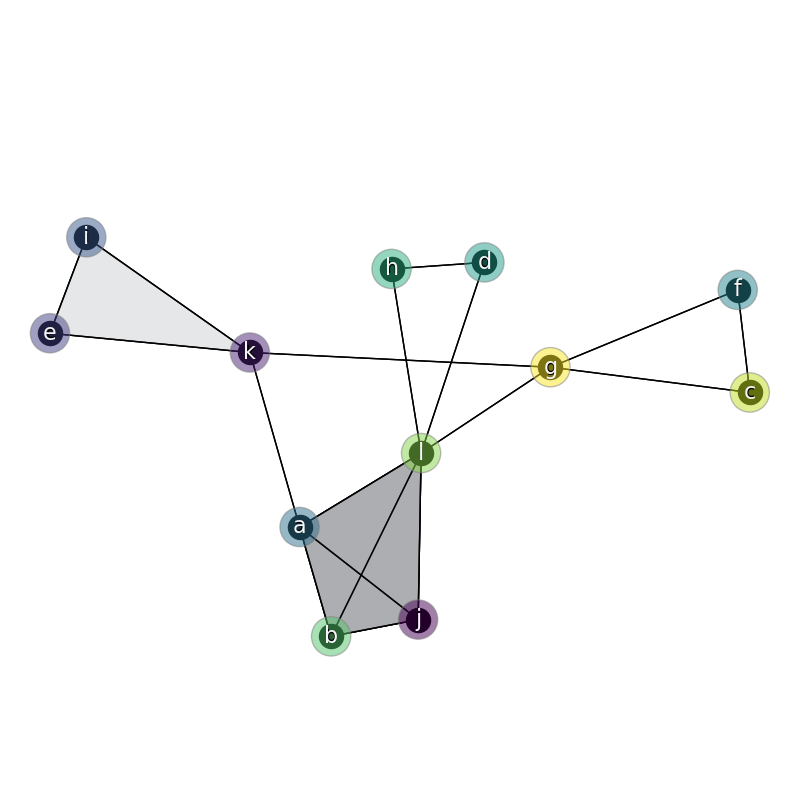

In [12]:
# Use the vertex cluster matrix S0 to pool the complex, and draw the pooled complex again
SC1_pooled = complex.pool_complex(SC1, S0)
SC1_pooled.drawComplex(S0)

Using list of simplices to construct boundaries...
Simplices: 
 {0: ['a', 'b', 'c', 'd', 'e'], 1: ['ab', 'ac', 'ad', 'bc', 'be', 'cd', 'ce', 'bd'], 2: ['bce', 'abd', 'bcd', 'abc', 'acd'], 3: ['abcd']}
Drawing simplicial complex...


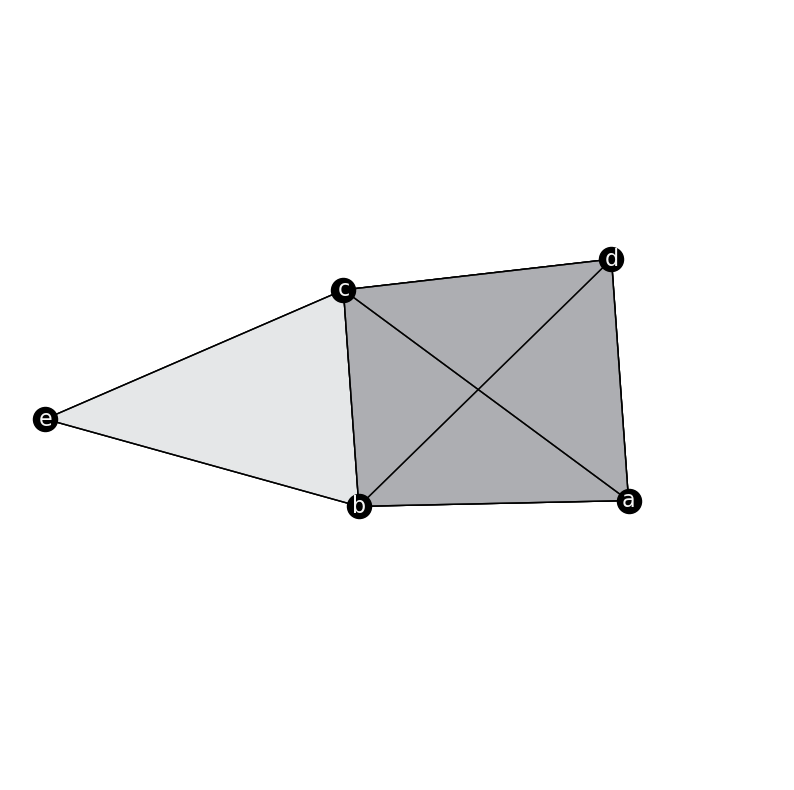

In [13]:
nodes = ['a','b','c','d','e']
edges = ['ab','ac','ad','bc','be','cd','ce', 'bd']
cycles = ['bce','abd', 'bcd','abc','acd']
tetra = ['abcd']
simplices = list([nodes, edges, cycles, tetra]) 
TestSX = complex.SComplex(simplices)
TestSX.drawComplex( )

In [14]:
TestSX.simplices

{0: ['a', 'b', 'c', 'd', 'e'],
 1: ['ab', 'ac', 'ad', 'bc', 'be', 'cd', 'ce', 'bd'],
 2: ['bce', 'abd', 'bcd', 'abc', 'acd'],
 3: ['abcd']}

In [15]:
#S0 = np.eye(len(nodes))
S0 = np.array([[1,0,0,1],[0,1,0,0],[0,1,1,1],[0,0,1,1],[0,1,0,0]]) # v x v'
print(S0)
newSC = complex.pool_complex(TestSX, S0)

[[1 0 0 1]
 [0 1 0 0]
 [0 1 1 1]
 [0 0 1 1]
 [0 1 0 0]]
Using list of adjacency matrices to construct simplices...
Simplices: 
 {0: ['a', 'b', 'c', 'd'], 1: ['ab', 'ac', 'ad', 'bc', 'bd', 'cd'], 2: ['abc', 'abd', 'dac', 'dbc'], 3: ['dabc']}


Drawing simplicial complex...


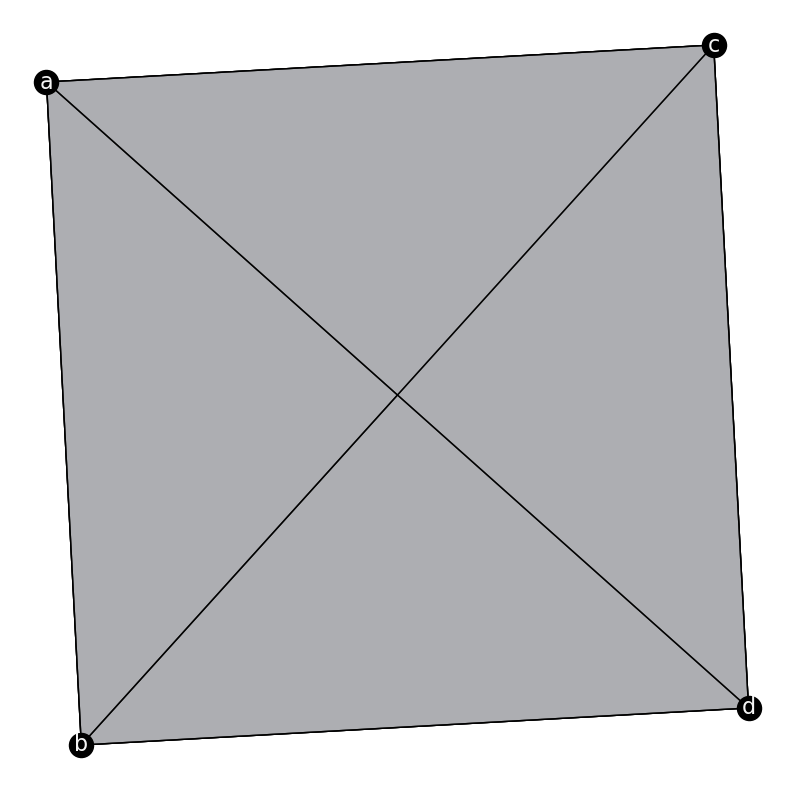

In [16]:
newSC.drawComplex()

### Example 3


Using list of simplices to construct boundaries...
Simplices: 
 {0: ['a', 'b', 'c', 'd', 'e', 'f'], 1: ['ae', 'ad', 'ac', 'bc', 'be', 'cd', 'ce', 'de', 'bf'], 2: ['acd', 'ace', 'ade', 'cde'], 3: ['acde']}
Drawing simplicial complex...
Vertex partition: {0: ['a'], 1: ['b', 'e'], 2: ['c', 'd'], 3: ['f']}


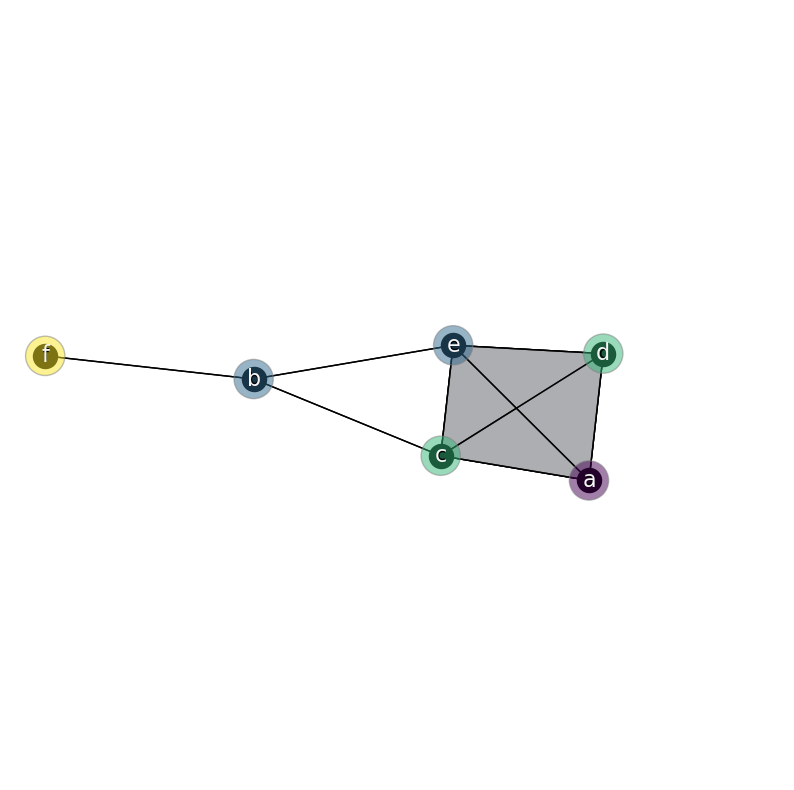

In [17]:
S0 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]]) # v x v'
# lists of simplices
nodes = ['a','b','c','d','e','f']
edges = ['ae','ad','ac','bc','be','cd','ce','de','bf']
cycles = ['acd','ace','ade','cde']
tetra = ['acde']
simplices = list([nodes, edges, cycles, tetra])
SC = complex.SComplex(simplices)
SC.drawComplex(S0)

In [18]:
newSC = complex.pool_complex(SC, S0)

Using list of adjacency matrices to construct simplices...
Simplices: 
 {0: ['a', 'b', 'c', 'd'], 1: ['ab', 'ac', 'bc', 'bd'], 2: ['abc']}


Drawing simplicial complex...


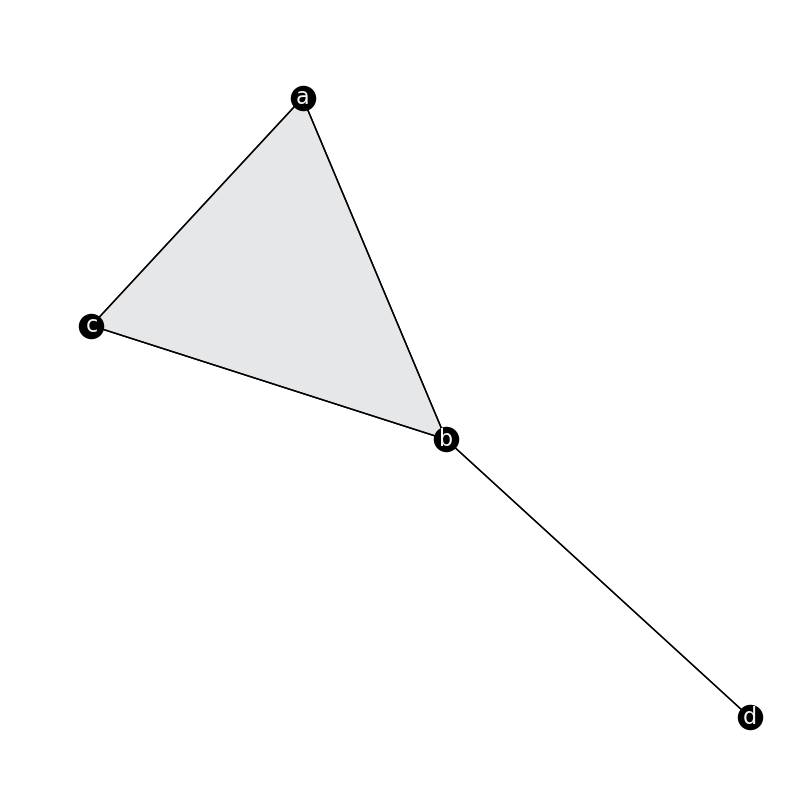

In [19]:
newSC.drawComplex()

Visualizing BOUNDARY MATRICES...


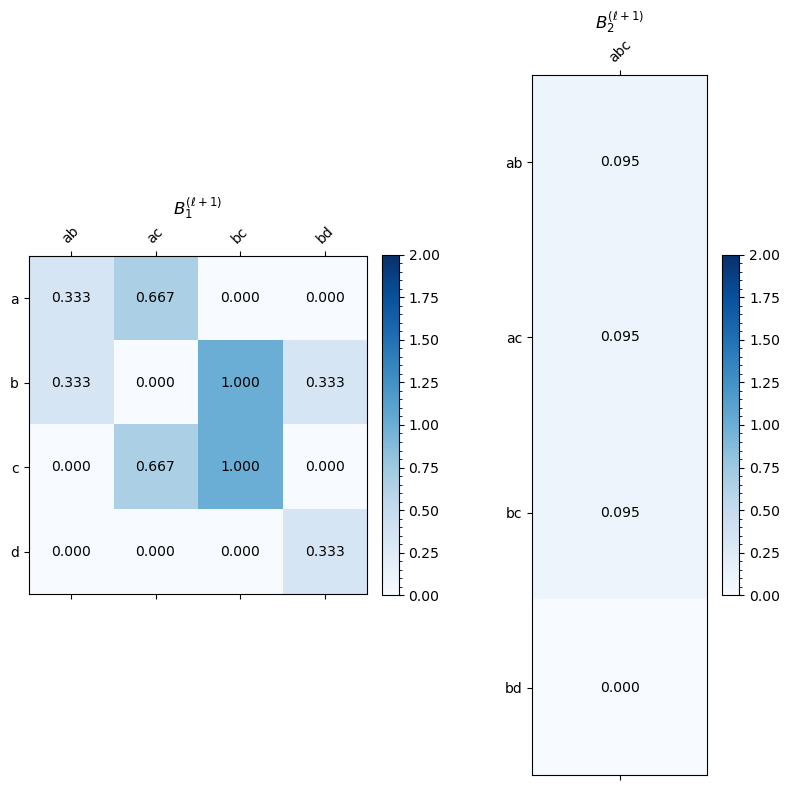

In [20]:
newSC.visualizeB()

Visualizing ADJACENCY MATRICES...


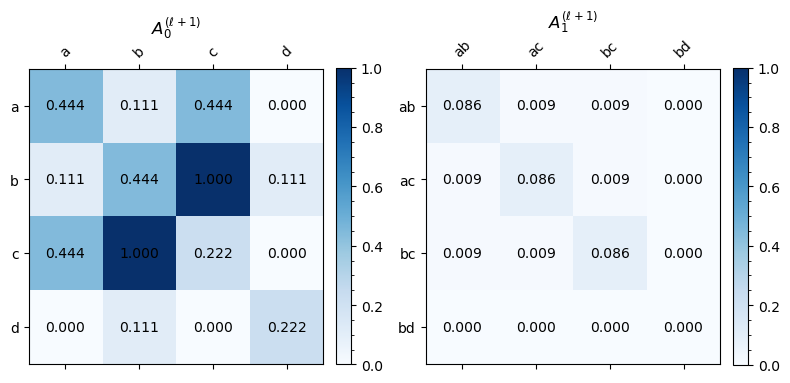

In [21]:
newSC.visualizeA()

### Example 3- Simplicial complex defined using boundary matrices


Using list of simplices to construct boundaries...
Simplices: 
 {0: ['a', 'b', 'c', 'd', 'e', 'f'], 1: ['ae', 'ad', 'ac', 'bc', 'be', 'cd', 'ce', 'de', 'bf'], 2: ['acd', 'ace', 'ade', 'cde'], 3: ['acde']}
Drawing simplicial complex...


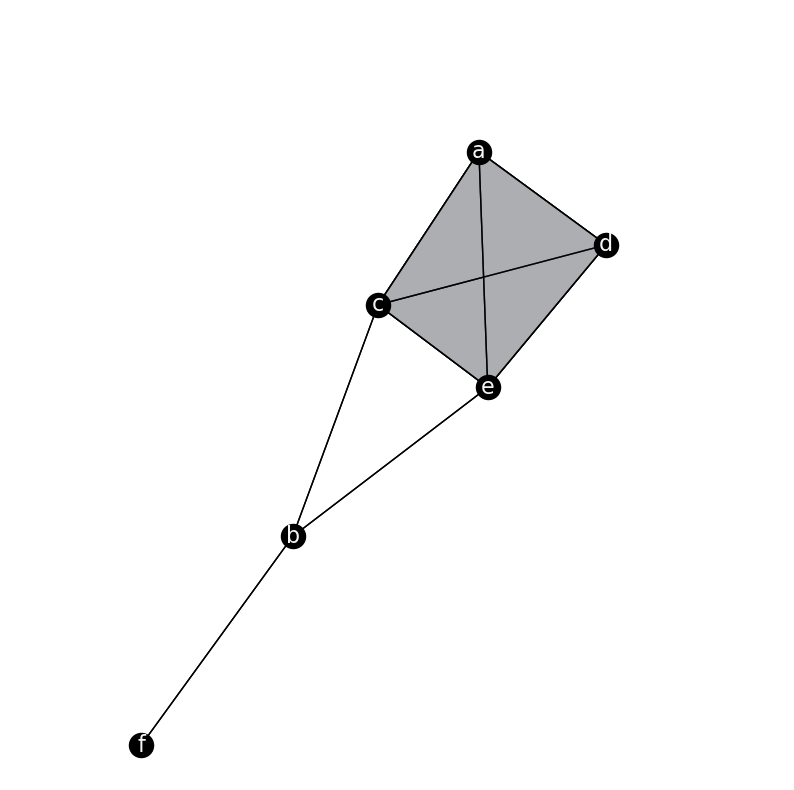

In [23]:
# lists of simplices
nodes = ['a','b','c','d','e','f']
edges = ['ae','ad','ac','bc','be','cd','ce','de','bf']
cycles = ['acd','ace','ade','cde']
tetra = ['acde']
simplices = list([nodes, edges, cycles, tetra])
SC = complex.SComplex(simplices)
SC.drawComplex()

In [24]:
P = np.eye(len(nodes))  # identity 
np.random.shuffle(P)  # shuffle rows to get a different permutation
print(P)

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


Using list of adjacency matrices to construct simplices...
Simplices: 
 {0: ['a', 'b', 'c', 'd', 'e', 'f'], 1: ['ab', 'ac', 'ad', 'bc', 'bd', 'cd', 'ce', 'de', 'ef'], 2: ['abc', 'abd', 'dac', 'dbc'], 3: ['dabc']}
Drawing simplicial complex...


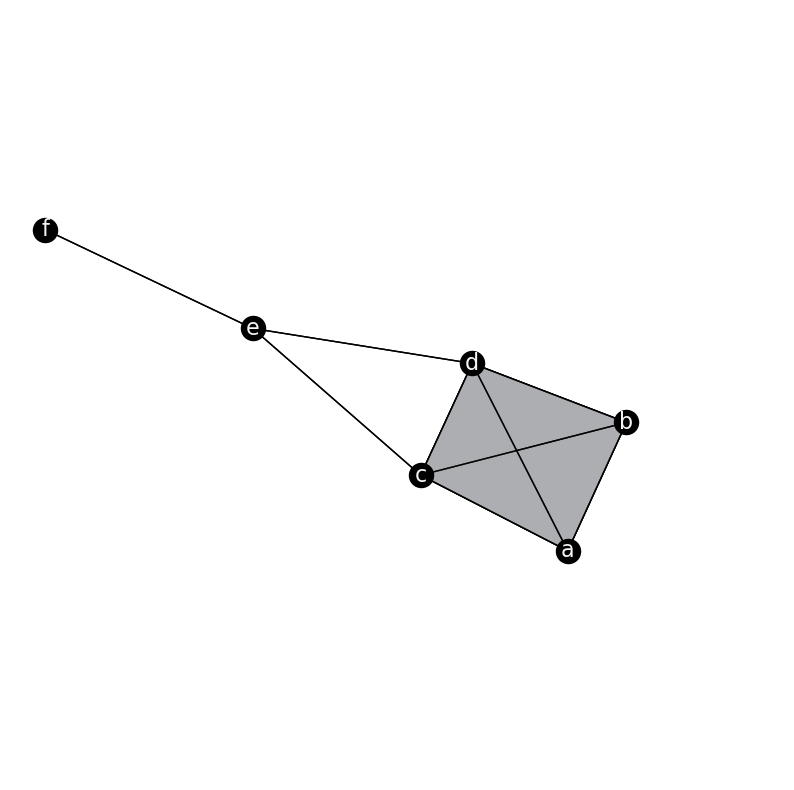

In [27]:
newSC = complex.pool_complex(SC, P)
newSC.drawComplex()


In [29]:
# lists of simplices
vertex_list = ['a','b','c','d','e','f','g','h','i','j','k','l']
edge_list = ['ab','ac','bc','cd','cj','de','df','dg','ef','gh','gi','gj','gk','gl','hi','jk','jl','kl']
triangle_list = ['abc','gjk','gjl','gkl','jkl']
tetrahedron_list = ['gjkl']
simplices = list([vertex_list, edge_list, triangle_list, tetrahedron_list])
SC = complex.SComplex(simplices)

Using list of simplices to construct boundaries...
Simplices: 
 {0: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l'], 1: ['ab', 'ac', 'bc', 'cd', 'cj', 'de', 'df', 'dg', 'ef', 'gh', 'gi', 'gj', 'gk', 'gl', 'hi', 'jk', 'jl', 'kl'], 2: ['abc', 'gjk', 'gjl', 'gkl', 'jkl'], 3: ['gjkl']}


Drawing simplicial complex...


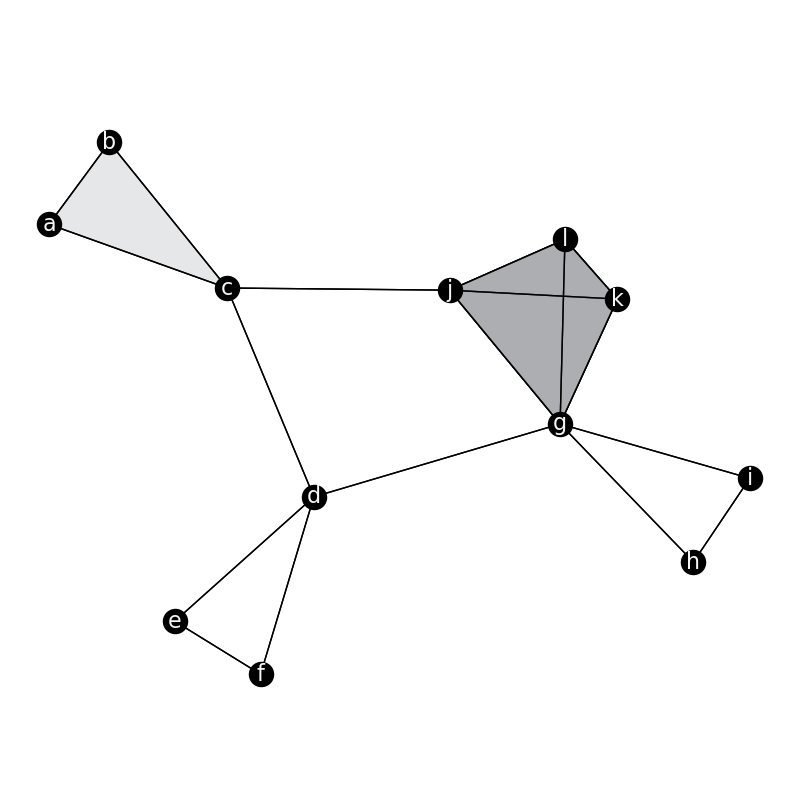

In [30]:
SC.drawComplex()

In [31]:
S0 = np.array([[1,0,0,0],[1,0,0,0],[1,0,0,0],[0,0,1,0],[0,0,1,0],[0,0,1,0],[0,1,1,1],[0,0,0,1],[0,0,0,1],[0,1,0,0],[0,1,0,0],[0,1,0,0]]) # v x v'

In [33]:
newSC = complex.pool_complex(SC, S0)

Using list of adjacency matrices to construct simplices...
Simplices: 
 {0: ['a', 'b', 'c', 'd'], 1: ['ab', 'ac', 'bc', 'bd', 'cd'], 2: ['dbc']}


Drawing simplicial complex...


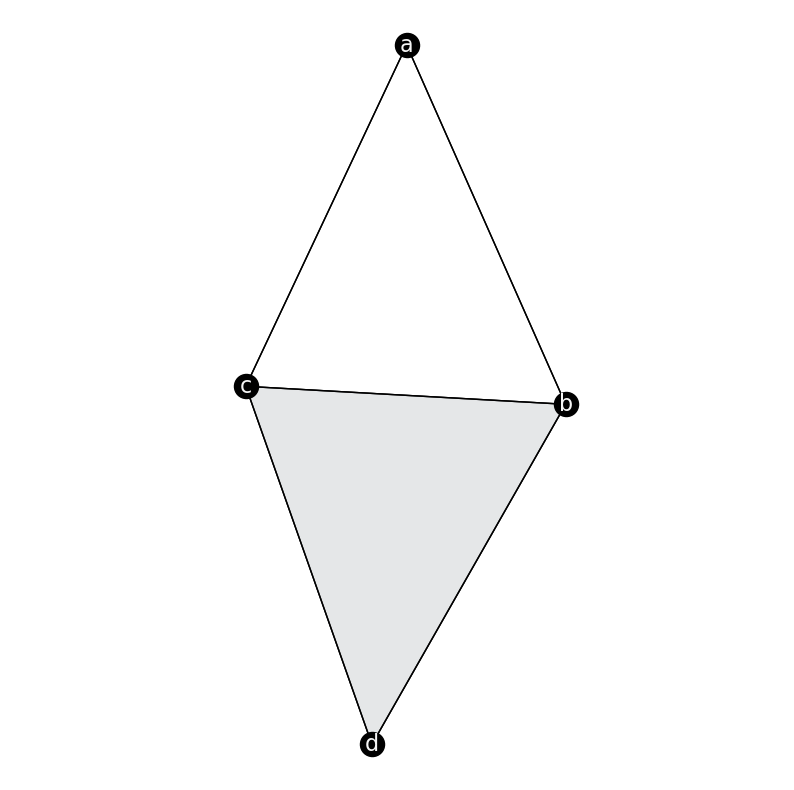

In [34]:
newSC.drawComplex()

In [35]:
# lists of simplices
vertex_list = ['a','b','c','d','e','f']
edge_list = ['ae','ad','ac','bc','be','cd','ce','de','bf']
triangle_list = ['acd','ace','ade','cde']
tetrahedron_list = ['acde']

SC = complex.SComplex(list([vertex_list, edge_list, triangle_list, tetrahedron_list]))

# Vertex cluster assignments-- determines # new vertices (in this case 3)
S0 = np.array([[1,0,0,0],[0,1,0,0],[0,1,1,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]]) # v x v'

Using list of simplices to construct boundaries...
Simplices: 
 {0: ['a', 'b', 'c', 'd', 'e', 'f'], 1: ['ae', 'ad', 'ac', 'bc', 'be', 'cd', 'ce', 'de', 'bf'], 2: ['acd', 'ace', 'ade', 'cde'], 3: ['acde']}


In [36]:
SC_pooled = complex.pool_complex(SC, S0)

Using list of adjacency matrices to construct simplices...
Simplices: 
 {0: ['a', 'b', 'c', 'd'], 1: ['ab', 'ac', 'bc', 'bd'], 2: ['abc']}
